<a href="https://www.kaggle.com/code/abhinavchinnu/21f1000473-notebook-t22024?scriptVersionId=236376170" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/crime-cast-forecasting-crime-categories/sample.csv
/kaggle/input/crime-cast-forecasting-crime-categories/train.csv
/kaggle/input/crime-cast-forecasting-crime-categories/test.csv


In [2]:
import pandas as pd
df = pd.read_csv("/kaggle/input/crime-cast-forecasting-crime-categories/train.csv")
X = df.drop('Crime_Category',axis='columns')
y = df['Crime_Category']

from sklearn.dummy import DummyClassifier
model = DummyClassifier().fit(X,y)

X_test = pd.read_csv("/kaggle/input/crime-cast-forecasting-crime-categories/test.csv")
y_pred=model.predict(X_test)

submission = pd.DataFrame({"ID": range(1,5001), 
                           "total_amount": y_pred}) 

submission.to_csv('submission.csv',index=False) 

In [3]:
import pandas as pd
import numpy as np
train_data = pd.read_csv('/kaggle/input/crime-cast-forecasting-crime-categories/train.csv')
test_data = pd.read_csv('/kaggle/input/crime-cast-forecasting-crime-categories/test.csv')
print('run_success')

run_success


**1. Understanding the basic structure of data:**

In [4]:
#Checking the shape of training and testing data.

print("Shape of training data:", train_data.shape)
print("Shape of testing data:", test_data.shape)

Shape of training data: (20000, 22)
Shape of testing data: (5000, 21)


In [5]:
#Looking at few sample of the data
train_data.head()

,Location,Cross_Street,Latitude,Longitude,Date_Reported,Date_Occurred,Time_Occurred,Area_ID,Area_Name,Reporting_District_no,...,Victim_Age,Victim_Sex,Victim_Descent,Premise_Code,Premise_Description,Weapon_Used_Code,Weapon_Description,Status,Status_Description,Crime_Category
0,4500 CARPENTER AV,NaN,34.1522,-118.3910,03/09/2020 12:00:00 AM,03/06/2020 12:00:00 AM,1800.0,15.0,N Hollywood,1563.0,...,75.0,M,W,101.0,STREET,NaN,NaN,IC,Invest Cont,Property Crimes
1,45TH ST,ALAMEDA ST,34.0028,-118.2391,02/27/2020 12:00:00 AM,02/27/2020 12:00:00 AM,1345.0,13.0,Newton,1367.0,...,41.0,M,H,216.0,SWAP MEET,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,Property Crimes
2,600 E MARTIN LUTHER KING JR BL,NaN,34.0111,-118.2653,08/21/2020 12:00:00 AM,08/21/2020 12:00:00 AM,605.0,13.0,Newton,1343.0,...,67.0,M,B,501.0,SINGLE FAMILY DWELLING,NaN,NaN,IC,Invest Cont,Property Crimes
3,14900 ORO GRANDE ST,NaN,34.2953,-118.4590,11/08/2020 12:00:00 AM,11/06/2020 12:00:00 AM,1800.0,19.0,Mission,1924.0,...,61.0,M,H,101.0,STREET,NaN,NaN,IC,Invest Cont,Property Crimes
4,7100 S VERMONT AV,NaN,33.9787,-118.2918,02/25/2020 12:00:00 AM,02/25/2020 12:00:00 AM,1130.0,12.0,77th Street,1245.0,...,0.0,X,X,401.0,MINI-MART,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,Property Crimes


In [6]:
#Isolating the names of the columns in traning data
train_data.columns

Index(['Location', 'Cross_Street', 'Latitude', 'Longitude', 'Date_Reported',
       'Date_Occurred', 'Time_Occurred', 'Area_ID', 'Area_Name',
       'Reporting_District_no', 'Part 1-2', 'Modus_Operandi', 'Victim_Age',
       'Victim_Sex', 'Victim_Descent', 'Premise_Code', 'Premise_Description',
       'Weapon_Used_Code', 'Weapon_Description', 'Status',
       'Status_Description', 'Crime_Category'],
      dtype='object')

In [7]:
# Isolating the name of the columns in the testing data
test_data.columns

Index(['Location', 'Cross_Street', 'Latitude', 'Longitude', 'Date_Reported',
       'Date_Occurred', 'Time_Occurred', 'Area_ID', 'Area_Name',
       'Reporting_District_no', 'Part 1-2', 'Modus_Operandi', 'Victim_Age',
       'Victim_Sex', 'Victim_Descent', 'Premise_Code', 'Premise_Description',
       'Weapon_Used_Code', 'Weapon_Description', 'Status',
       'Status_Description'],
      dtype='object')

**2. Dropping unwanted columns in test and train data**

In [8]:
# From the columns we see that some of the columns are not needed
# 1.  Area_Name : Area_ID present
# 2. Premise_Discription : Premise_Code present
# 3. Weapon_Discription: Weapon_Code present
# 4. Location: Latitude: Longitue and Latitude Present
# 5. Status_Discription: Status Present
train_data = train_data.drop(columns=['Location', 'Area_Name', 'Premise_Description', 'Status_Description','Weapon_Description'], axis=1)
test_data = test_data.drop(columns=['Location', 'Area_Name', 'Premise_Description', 'Status_Description','Weapon_Description'], axis=1)


**3. Removing null values:**

In [9]:
# Checking for null values in traning data:
train_data.isnull().sum()

Cross_Street             16552
Latitude                     0
Longitude                    0
Date_Reported                0
Date_Occurred                0
Time_Occurred                0
Area_ID                      0
Reporting_District_no        0
Part 1-2                     0
Modus_Operandi            2741
Victim_Age                   0
Victim_Sex                2624
Victim_Descent            2624
Premise_Code                 0
Weapon_Used_Code         12665
Status                       0
Crime_Category               0
dtype: int64

In [10]:
# Checking for null values in testing data:
test_data.isnull().sum()

Cross_Street             4190
Latitude                    0
Longitude                   0
Date_Reported               0
Date_Occurred               0
Time_Occurred               0
Area_ID                     0
Reporting_District_no       0
Part 1-2                    0
Modus_Operandi            684
Victim_Age                  0
Victim_Sex                643
Victim_Descent            643
Premise_Code                0
Weapon_Used_Code         3153
Status                      0
dtype: int64

In [11]:
#Removing null values in both training and testing data

train_data = train_data.replace({None: np.nan, "": np.nan}).fillna(0)
test_data = test_data.replace({None: np.nan, "": np.nan}).fillna(0)
print("Null values removed")

Null values removed


**4. Data visualisation::**

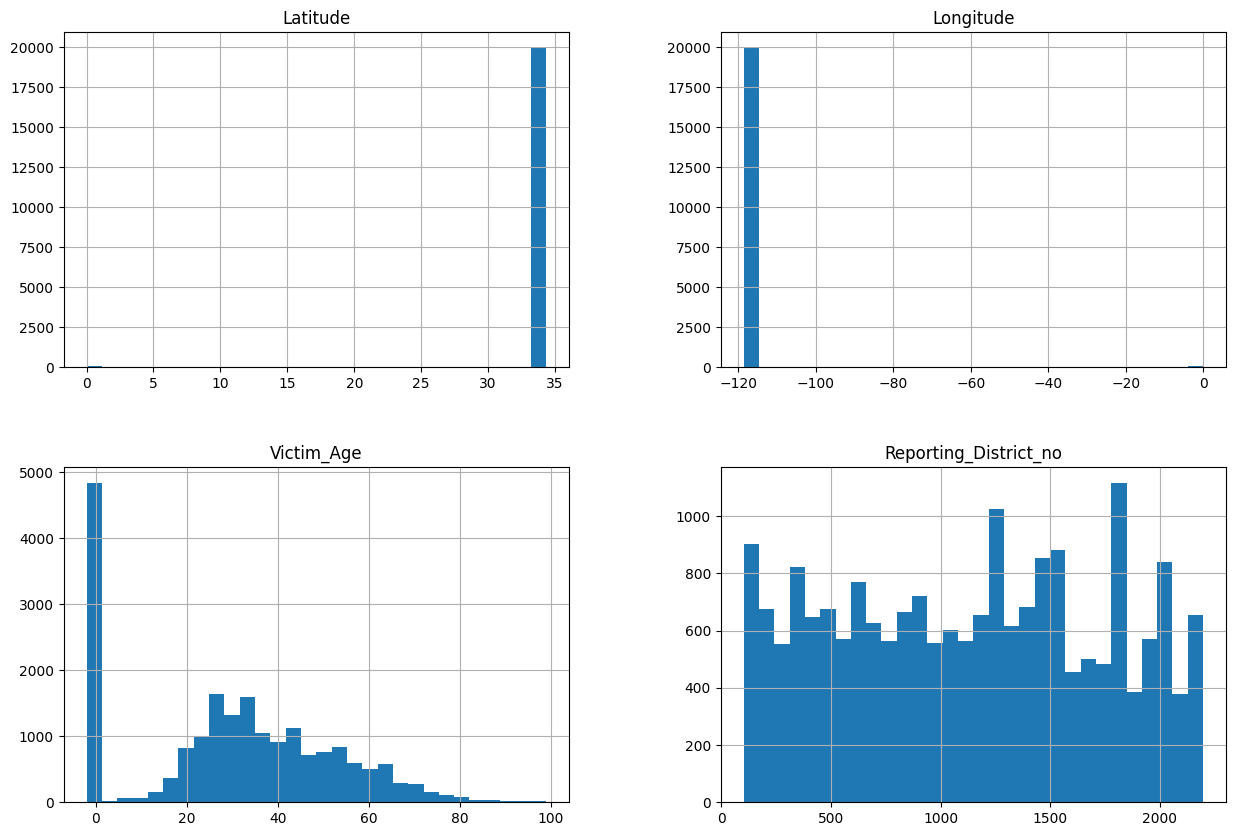

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of numerical features
numerical_features = ['Latitude', 'Longitude', 'Victim_Age', 'Reporting_District_no']
train_data[numerical_features].hist(bins=30, figsize=(15, 10))
plt.show()

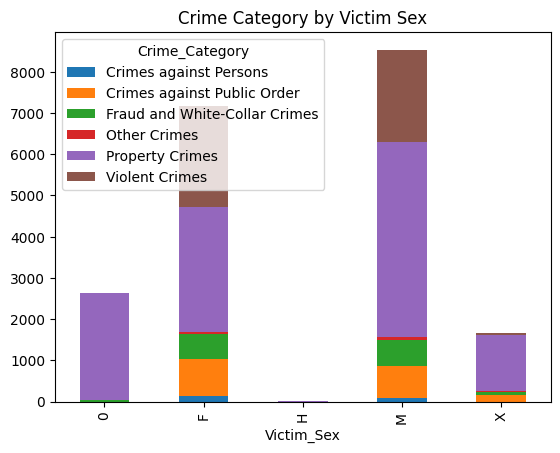

In [13]:
# Correlation between victim sex and crime category:
pd.crosstab(train_data['Victim_Sex'], train_data['Crime_Category']).plot(kind='bar', stacked=True)
plt.title('Crime Category by Victim Sex')
plt.show()

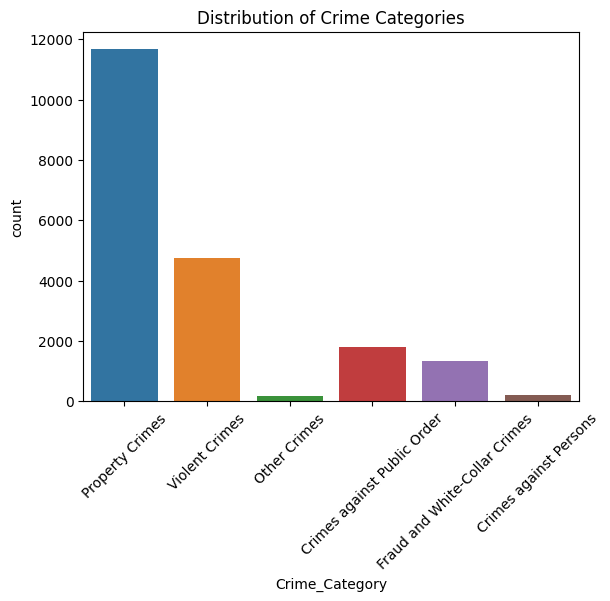

In [14]:
# Distribution of crime categories:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x='Crime_Category', data=train_data)
plt.title('Distribution of Crime Categories')
plt.xticks(rotation=45)  # Rotate x-axis labels by 45 degrees
plt.show()


1. Latitude and Longitude:

    a. Both the Latitude and Longitude histograms have values clustered around specific ranges (e.g., around 35 for Latitude and -120 for Longitude).  
    b. The presence of data points at 0 indicates possible missing or incorrect data entries, as 0 is not a valid latitude or longitude for most real-world locations. 
       
       
2. Victim Age:

    a. The Victim_Age histogram shows a strong skew towards younger ages.  
    b.  A significant number of entries are around 0.This indicates missing values.  
    c. The age distribution suggests that crimes involving younger individuals are more common in this dataset.

3. Reporting District Number:

    The Reporting_District_no histogram shows a more evenly distributed set of values across different districts, with no apparent skew or concentration in 
    specific regions.This indicates that the dataset covers multiple reporting districts.  
    
4. Crime Category vs Victim Sex:  

    Property crime and Violent crimes cases are the major crime in both Male and Female category.
    
5. Over all Property crime is the larger incidences followed by violent crime.

**5. Data Cleaning:**

1. Remove null values

In [15]:
train_data = train_data.replace({None: np.nan, "": np.nan}).fillna(0)
test_data = test_data.replace({None: np.nan, "": np.nan}).fillna(0)
print("Done")

Done


In [16]:
# Checking if there are null values still left:
print(f"Count of NaN values in 'train_csv': {train_data.isna().sum().sum()} values")
print(f"Count of NaN values in 'test_csv': {test_data.isna().sum().sum()} values")

Count of NaN values in 'train_csv': 0 values
Count of NaN values in 'test_csv': 0 values


1. Latitude and Lontitude

In [17]:
# Checking if the values are 0 in latitude and longitude:

num_zeroes_latitude_train = (train_data['Latitude'] == 0).sum()
print("Number of zeroes in train_data Latitude:", num_zeroes_latitude_train)

num_zeroes_longitude_train = (train_data['Longitude'] == 0).sum()
print("Number of zeroes in train_data Longitude:", num_zeroes_longitude_train)




Number of zeroes in train_data Latitude: 78
Number of zeroes in train_data Longitude: 78


In [18]:
# Removing rows with latitude and longitude = 0 as both being zero indicates missing values
train_data = train_data[~((train_data['Latitude'] == 0) & (train_data['Longitude'] == 0))]

print("Shape of the data after removing zero:",train_data.shape)

Shape of the data after removing zero: (19922, 17)


2. Age

In [19]:
# Find unique values in the 'Victim_Age' column
unique_ages = train_data['Victim_Age'].unique()

# Print the unique values
print('Unique values in Victim_Age column:', unique_ages)

Unique values in Victim_Age column: [75. 41. 67. 61.  0. 50. 68. 22. 31. 46. 72. 26. 38. 37. 42. 40. 53. 60.
 29. 13. 33. 27. 15. 23. 74. 63. 78. 51. 44. 34. 69. 36. 52. 25. 49. 48.
 32. 18. 35. 24. 39. 16. 28. 47. 30. 64. 76.  5. 58. 45. 57. 19. 55. 54.
 21. 65. 17. 20. 77. 82. 56. -2. 84. 59. 43.  7. 70. 66. 62. 14. 80. 71.
 81. 96. 12. 11.  4. 83. 10.  8.  6. 88. 86. 73.  9. 87. 85. 93. 95. 99.
 79.  3.  2. 91. 92. 90. 89. 98. -1. 94.]


In [20]:
#Finding the what are the negative values in age:
negative_age_values = train_data[train_data['Victim_Age'] < 0]['Victim_Age'].unique()
print('Unique negative values in Victim_Age column:', negative_age_values)

Unique negative values in Victim_Age column: [-2. -1.]


In [21]:
# Replace negative values in 'Victim_Age' with 0
train_data.loc[train_data['Victim_Age'] < 0, 'Victim_Age'] = 0
print("Negative values successfully removed")



Negative values successfully removed


In [22]:
# Checking if some negative value is still left
remaining_negative_age_values = train_data[train_data['Victim_Age'] < 0]['Victim_Age'].unique()
print('Unique negative values in Victim_Age column:', remaining_negative_age_values)

Unique negative values in Victim_Age column: []


**6. Feature engineering**

6.a. Converting same categorical values to numerical and simplyfying some numerical values

In [23]:
# Unique values in CrossStreat
unique_values_train = train_data['Cross_Street'].unique()
print("Unique values in train_data Cross_Street:", unique_values_train)


Unique values in train_data Cross_Street: [0 'ALAMEDA                      ST' 'LASSEN                       ST' ...
 'VICTORIA' '39TH                         ST' 'HAVELOCK']


In [24]:
# Some of the croosstreet values are 0 which indicate not happened cross street.
# Convert if happend cross-street 1 and did not happen 0
# Replace NaN with 0 and non-NaN values with 1 in the Cross_Street column
train_data['Happened_CrossStreet'] = train_data['Cross_Street'].notna().astype(int)
test_data['Happened_CrossStreet'] = test_data['Cross_Street'].notna().astype(int)



6.b. Scaling some numerical value:

In [25]:
# Convert the Reporting_District_no to integers
train_data['Reporting_District_no'] = train_data['Reporting_District_no'].astype(int)
test_data['Reporting_District_no'] = test_data['Reporting_District_no'].astype(int)

# Convert 'Part 1-2' column to binary: 0 for '1' and 1 for others
train_data['Part 1-2'] = train_data['Part 1-2'].map({1: 0}).fillna(1).astype(int)
test_data['Part 1-2'] = test_data['Part 1-2'].map({1: 0}).fillna(1).astype(int)

# Simplify Premise_Code by dividing by 100 and taking the integer part
train_data['Premise_Code_Extract'] = train_data['Premise_Code'].floordiv(100)
test_data['Premise_Code_Extract'] = test_data['Premise_Code'].floordiv(100)

# Create a binary feature for arrest status
train_data['Arrest_Status'] = train_data['Status'].isin(['AA', 'JA']).astype(int)
test_data['Arrest_Status'] = test_data['Status'].isin(['AA', 'JA']).astype(int)

6.c. Date and time (information extraction)

In [26]:
import datetime as dt

# Define the date format
date_format = '%m/%d/%Y %I:%M:%S %p'

# Convert the date strings to datetime objects for both training and test data
train_data['Date_Reported'] = pd.to_datetime(train_data['Date_Reported'], format=date_format)
train_data['Date_Occurred'] = pd.to_datetime(train_data['Date_Occurred'], format=date_format)
test_data['Date_Reported'] = pd.to_datetime(test_data['Date_Reported'], format=date_format)
test_data['Date_Occurred'] = pd.to_datetime(test_data['Date_Occurred'], format=date_format)

# Generate new features based on the datetime columns
train_data['Time_Passed'] = (train_data['Date_Reported'] - train_data['Date_Occurred']).dt.days
test_data['Time_Passed'] = (test_data['Date_Reported'] - test_data['Date_Occurred']).dt.days

# Extract day of occurrence
train_data['Incident_date'] = train_data['Date_Occurred'].dt.day
test_data['Incident_date'] = test_data['Date_Occurred'].dt.day

# Extract the weekday from the date occurred
train_data['Incident_day'] = train_data['Date_Occurred'].dt.weekday
test_data['Incident_day'] = test_data['Date_Occurred'].dt.weekday

# Extract the month from the date occurred
train_data['Incident_month'] = train_data['Date_Occurred'].dt.month
test_data['Incident_month'] = test_data['Date_Occurred'].dt.month

# Extract the day from the date reported
train_data['Reporting_Date'] = train_data['Date_Reported'].dt.day
test_data['Reporting_Date'] = test_data['Date_Reported'].dt.day

# Convert the time of occurrence to an hour format by dividing by 100 and taking the integer part
train_data['Incident_time'] = train_data['Time_Occurred'].floordiv(100)
test_data['Incident_time'] = test_data['Time_Occurred'].floordiv(100)


print("Success")


Success


In [27]:
# Drop the redundant columns
train_data = train_data.drop(columns=['Date_Reported', 'Date_Occurred', 'Cross_Street', 'Time_Occurred'], axis=1)
test_data = test_data.drop(columns=['Date_Reported', 'Date_Occurred', 'Cross_Street', 'Time_Occurred'], axis=1)

6.d. Working with Modus_Operandi

In [28]:
#Finding unique values for Modus Operandi:
# For train_data
unique_modus_operandi_train = train_data['Modus_Operandi'].unique()
print("Unique Modus_Operandi values in train_data:")
print(unique_modus_operandi_train)

# For test_data
unique_modus_operandi_test = test_data['Modus_Operandi'].unique()
print("Unique Modus_Operandi values in test_data:")
print(unique_modus_operandi_test)


Unique Modus_Operandi values in train_data:
['0385' '0906 0352 0371 0446 1822 0344 0416 0417' '0329 1202' ...
 '0416 0446 2004 0913' '1822 0209 0344 1414 1420'
 '1202 2038 0913 0602 1242 0553']
Unique Modus_Operandi values in test_data:
['0416 1241 1243 1813 1821 2000' '0344 0394'
 '1822 0701 1914 0355 1202 0100' ... '1814 0216' '2004 1300 0344'
 '1300 0325']


In [29]:
import pandas as pd

# Convert integers to strings
train_data['Modus_Operandi'] = train_data['Modus_Operandi'].astype(str)
test_data['Modus_Operandi'] = test_data['Modus_Operandi'].astype(str)


# Initialize a list to hold the binary feature DataFrames
train_binary_features = []
test_binary_features = []

# Get unique crime codes from both train and test data
all_crime_codes = set()
for modus_operandi in train_data['Modus_Operandi']:
    all_crime_codes.update(modus_operandi)
for modus_operandi in test_data['Modus_Operandi']:
    all_crime_codes.update(modus_operandi)

# Convert set to list for consistent ordering
all_crime_codes = sorted(all_crime_codes)

# Create binary feature DataFrames
for code in all_crime_codes:
    train_binary_features.append(
        train_data['Modus_Operandi'].apply(lambda x: 1 if code in x else 0).rename(f'Crime_{code}')
    )
    test_binary_features.append(
        test_data['Modus_Operandi'].apply(lambda x: 1 if code in x else 0).rename(f'Crime_{code}')
    )

# Concatenate the binary features with the original DataFrames
train_data = pd.concat([train_data] + train_binary_features, axis=1)
test_data = pd.concat([test_data] + test_binary_features, axis=1)

# Drop the original 'Modus_Operandi' column if no longer needed
train_data.drop(columns=['Modus_Operandi'], inplace=True)
test_data.drop(columns=['Modus_Operandi'], inplace=True)

print('Done')

Done


In [30]:
#Check if the above operation has created some null values in our dataset:
print(f"Count of NaN values in 'train_csv': {train_data.isna().sum().sum()} values")
print(f"Count of NaN values in 'test_csv': {test_data.isna().sum().sum()} values")

Count of NaN values in 'train_csv': 0 values
Count of NaN values in 'test_csv': 0 values


6.e. Converting crime categories to indices:

In [31]:
# Find unique values in 'Crime_Category' column
unique_categories = train_data['Crime_Category'].unique()

# Print unique values
print(unique_categories)


['Property Crimes' 'Violent Crimes' 'Other Crimes'
 'Crimes against Public Order' 'Fraud and White-Collar Crimes'
 'Crimes against Persons']


In [32]:
# Converting Crime_catoegory into numeric indices

crime_list = ['Property Crimes', 'Violent Crimes','Other Crimes',
 'Crimes against Public Order', 'Fraud and White-Collar Crimes',
 'Crimes against Persons']
train_data["Crime_Category"] = train_data["Crime_Category"].apply(lambda x: crime_list.index(x))

print("Success")

Success


**7. PreProcessing:**  
    **7.a. MinMaxScalar for numerical columns**  
    **7.b. One Hot Encoding for categorical columns**

7.a. MinMaxScalar for numerical columns

In [33]:
from sklearn.preprocessing import MinMaxScaler

numerical_columns = ['Area_ID', 'Latitude', 'Longitude', 'Victim_Age',  'Time_Passed', 'Reporting_District_no',
                  'Premise_Code', 'Weapon_Used_Code', 'Incident_date', 'Reporting_Date', 'Premise_Code_Extract', 'Incident_day', 'Incident_time', 'Incident_month']
normalization = MinMaxScaler()
train_data[numerical_columns] = normalization.fit_transform(train_data[numerical_columns])
test_data[numerical_columns] = normalization.fit_transform(test_data[numerical_columns])

print('Success')

Success


7.b. One Hot Encoding for Categorical Columns

In [34]:
# One hot encoding for categorical columns
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder


# Convert columns to string
cat_cols = ['Victim_Sex', 'Victim_Descent', 'Status']
train_data[cat_cols] = train_data[cat_cols].astype(str)
test_data[cat_cols] = test_data[cat_cols].astype(str)

# Initialize OneHotEncoder
encoder = OneHotEncoder(sparse=False, drop='first', dtype="int8")

# Fit the encoder on the combined data to ensure consistent encoding
combined_data = pd.concat([train_data[cat_cols], test_data[cat_cols]], axis=0)
encoder.fit(combined_data)

# Transform the training data
train_encoded = encoder.transform(train_data[cat_cols])
train_encoded_df = pd.DataFrame(train_encoded, columns=encoder.get_feature_names_out(cat_cols))

# Transform the test data
test_encoded = encoder.transform(test_data[cat_cols])
test_encoded_df = pd.DataFrame(test_encoded, columns=encoder.get_feature_names_out(cat_cols))

# Ensure index alignment
train_encoded_df.index = train_data.index
test_encoded_df.index = test_data.index

# Concatenate the encoded columns back to the original DataFrames
train_data = pd.concat([train_data, train_encoded_df], axis=1)
test_data = pd.concat([test_data, test_encoded_df], axis=1)

# Drop the original categorical columns
train_data.drop(columns=cat_cols, inplace=True)
test_data.drop(columns=cat_cols, inplace=True)

print("Train data shape after encoding:", train_data.shape)
print("Test data shape after encoding:", test_data.shape)


print("Train data shape after aligning columns:", train_data.shape)
print("Test data shape after aligning columns:", test_data.shape)


Train data shape after encoding: (19922, 55)
Test data shape after encoding: (5000, 54)
Train data shape after aligning columns: (19922, 55)
Test data shape after aligning columns: (5000, 54)


/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


**8. Model Training**

In [35]:
# Drop the target variable from the training data
X = train_data.drop(columns=['Crime_Category'])
y = train_data['Crime_Category']



In [36]:

# KNN (K-Nearest Neighbors)
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score




# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the parameter grid for GridSearchCV
param_grid = {
    'knn__n_neighbors': [3, 5, 7, 10],
    'knn__weights': ['uniform', 'distance'],
    'knn__metric': ['euclidean', 'manhattan']
}

# Create a pipeline with scaling and KNN model
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier())
])

# Initialize GridSearchCV with the pipeline and parameter grid
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy')

# Fit GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and best score from the grid search
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f'Best Parameters: {best_params}')
print(f'Best Cross-Validation Score: {best_score:.2f}')

# Use the best parameters to train the final model
best_pipeline = grid_search.best_estimator_

# Make predictions on the validation set with the best model
y_pred = best_pipeline.predict(X_val)

# Evaluate the model on the validation set
accuracy = accuracy_score(y_val, y_pred)
print(f'Validation Accuracy: {accuracy:.2f}')

# Predict on the test_data with the best model
test_data_scaled = best_pipeline.named_steps['scaler'].transform(test_data)  # Apply scaling to test data
test_predictions = best_pipeline.named_steps['knn'].predict(test_data_scaled)


print("Predictions on test data complete")


Best Parameters: {'knn__metric': 'manhattan', 'knn__n_neighbors': 10, 'knn__weights': 'distance'}
Best Cross-Validation Score: 0.82
Validation Accuracy: 0.83
Predictions on test data complete


In [37]:

# Decision tree alogrithm

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score


print("X shape:", X.shape)
print("y shape:", y.shape)

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
test_data_scaled = scaler.transform(test_data)

# Initialize and train the Decision Tree model
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)


y_pred = tree.predict(X_val)


accuracy = accuracy_score(y_val, y_pred)
print(f'Validation Accuracy: {accuracy:.2f}')


test_predictions = tree.predict(test_data_scaled)

print("Predictions on test data complete")


X shape: (19922, 54)
y shape: (19922,)
Validation Accuracy: 0.86
Predictions on test data complete


In [38]:

#SVC : Support vector classifier

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score


X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
test_data = scaler.transform(test_data)


svc = SVC(kernel='linear')  
svc.fit(X_train, y_train)

# Intialize and train SVC.
y_pred = svc.predict(X_val)

accuracy = accuracy_score(y_val, y_pred)
print(f'Validation Accuracy: {accuracy:.2f}')


test_predictions = svc.predict(test_data)

print("Predictions on test data complete")


Validation Accuracy: 0.84
Predictions on test data complete


In [39]:
import pandas as pd


submission = pd.DataFrame(columns=["ID", "Crime_Category"])


submission["ID"] = range(1, len(test_predictions) + 1)
submission["Crime_Category"] = pd.Series(test_predictions, dtype="int")


submission["Crime_Category"] = submission["Crime_Category"].apply(lambda x: crime_list[int(x)])


submission.to_csv("submission.csv", index=False)


print(submission.head())


   ID                 Crime_Category
0   1                 Violent Crimes
1   2                Property Crimes
2   3  Fraud and White-Collar Crimes
3   4                Property Crimes
4   5    Crimes against Public Order
